### kNN. Линейные модели. Работа с признаками

### Визуализация решающих поверхностей в kNN.

Изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html).

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [23]:
import kagglehub
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_wine
data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Пропущенные значения**

In [ ]:
X.isnull().any().any()

False

In [ ]:
X.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
dtype: object

In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

**Разбиение выборок**

In [3]:
from sklearn.model_selection import train_test_split
np.random.seed(30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

**Обучение классификатора**

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [5]:
KNN_train = X_train[['alcohol', 'magnesium']]
KNN_test = X_test[['alcohol', 'magnesium']]

In [7]:
from sklearn import preprocessing
normalizer = preprocessing.StandardScaler()

X_real_norm_np = normalizer.fit_transform(KNN_train)
X = pd.DataFrame(data=X_real_norm_np)

X_test_real_norm_np = normalizer.transform(KNN_test)
X_test = pd.DataFrame(data=X_test_real_norm_np)

In [8]:
clfs_train = [
    KNeighborsClassifier(n_neighbors=1, p=2, n_jobs=10),
    KNeighborsClassifier(n_neighbors=3, p=2, n_jobs=10),
    KNeighborsClassifier(n_neighbors=5, p=2, n_jobs=10),
    KNeighborsClassifier(n_neighbors=10, p=2, n_jobs=10),
    KNeighborsClassifier(n_neighbors=15, p=2, n_jobs=10),
    KNeighborsClassifier(n_neighbors=25, p=2, n_jobs=10)
]
clfs_test = [
    KNeighborsClassifier(n_neighbors=1, p=2, n_jobs=10),
    KNeighborsClassifier(n_neighbors=3, p=2, n_jobs=10),
    KNeighborsClassifier(n_neighbors=5, p=2, n_jobs=10),
    KNeighborsClassifier(n_neighbors=10, p=2, n_jobs=10),
    KNeighborsClassifier(n_neighbors=15, p=2, n_jobs=10),
    KNeighborsClassifier(n_neighbors=25, p=2, n_jobs=10)
]
print("NN   Train  Test")
for nn, clf_train, clf_test in zip([1, 3, 5, 10, 15, 25], clfs_train, clfs_test):
    clf_train.fit(X, y_train)
    y_predicted_train = clf_train.predict(X)
    accuracy_train = np.mean(y_train == y_predicted_train)

    clf_test.fit(X, y_train)
    y_predicted_test = clf_test.predict(X_test)
    accuracy_test = np.mean(y_test == y_predicted_test)
    print(f"{nn:<2}   {accuracy_train:.2f}   {accuracy_test:.2f}")

NN   Train  Test
1    1.00   0.57
3    0.83   0.61
5    0.79   0.63
10   0.77   0.70
15   0.75   0.78
25   0.72   0.70


### KNN своими руками

Реализация алгоритма KNN своими руками для классификации.

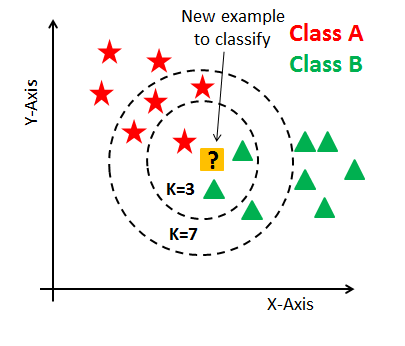

In [13]:
import numpy as np
from collections import Counter

class KNN:
    def __init__(self, k:int):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = []
        for i in range(len(X)):
            nearest_indices = np.argsort(self.count_distance(X[i], self.X_train))[:self.k]
            nearest_labels = [self.y_train[j] for j in nearest_indices]
            y_pred.append(Counter(nearest_labels).most_common(1)[0][0])
        return np.array(y_pred)

    def count_distance(self, x, y):
        return np.sqrt(np.sum((x - y)**2, axis=1))

In [14]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [15]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

### Линейная регрессия.

Рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [24]:
data = pd.read_csv(f'{kagglehub.dataset_download("shivam2503/diamonds")}/diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Решается задача предсказания цены бриллианта `price` в зависимости от его характеристик.

**Пропущенные значения**

In [25]:
data.isnull().any().any()

np.False_

In [26]:
del data['Unnamed: 0']

In [27]:
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


**Выборочная корреляция**

In [30]:
data.corrwith(data.price, numeric_only=True)

,0
carat,0.921591
depth,-0.010647
table,0.127134
price,1.000000
x,0.884435
y,0.865421
z,0.861249


In [31]:
data.corr(numeric_only=True)

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


С целевой переменной больше всего коррелирует carat, x, y, z (размеры), что в целом логично.

**Унитарное кодирование**

In [32]:
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [34]:
from sklearn.preprocessing import OneHotEncoder

data['cut'] = data['cut'].astype('category')
data['color'] = data['color'].astype('category')
data['clarity'] = data['clarity'].astype('category')

data['cut_new'] = data['cut'].cat.codes
data['color_new'] = data['color'].cat.codes
data['clarity_new'] = data['clarity'].cat.codes
enc = OneHotEncoder(handle_unknown='ignore')
encoded_data = enc.fit_transform(data[['cut', 'color', 'clarity']])
feature_names = enc.get_feature_names_out(['cut', 'color', 'clarity'])
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=feature_names)
final_df = pd.concat([data, encoded_df], axis=1)

print(final_df)

       carat        cut color clarity  depth  table  price     x     y     z  \
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43   
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31   
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31   
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63   
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75   
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...   
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50   
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61   
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56   
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74   
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64   

       ...  color_I  color_J  clarity_I

**Разделение выборки**

In [35]:
y = final_df['price']
y

,price
0,326
1,326
2,327
3,334
4,335
...,...
53935,2757
53936,2757
53937,2757
53938,2757


In [36]:
del final_df['price']
X = final_df

X.head(8)

,carat,cut,color,clarity,depth,table,x,y,z,cut_new,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,3,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,3,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,1,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,0.24,Very Good,J,VVS2,62.8,57.0,3.94,3.96,2.48,4,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.24,Very Good,I,VVS1,62.3,57.0,3.95,3.98,2.47,4,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,0.26,Very Good,H,SI1,61.9,55.0,4.07,4.11,2.53,4,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [37]:
final_df

,carat,cut,color,clarity,depth,table,x,y,z,cut_new,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,3,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,3,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,1,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50,2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53936,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53937,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56,4,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
53938,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74,3,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [38]:
from sklearn.model_selection import train_test_split

np.random.seed(30)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [39]:
y

,price
0,326
1,326
2,327
3,334
4,335
...,...
53935,2757
53936,2757
53937,2757
53938,2757


In [40]:
X_train

,carat,cut,color,clarity,depth,table,x,y,z,cut_new,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
35511,0.41,Good,E,SI1,63.6,56.0,4.73,4.70,3.00,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6782,0.82,Ideal,D,SI1,61.9,56.0,5.99,6.02,3.72,2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
42445,0.57,Very Good,E,SI2,61.2,57.0,5.31,5.35,3.26,4,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
52574,0.70,Premium,D,SI2,61.9,58.0,5.71,5.67,3.52,3,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
19529,1.01,Premium,G,VVS2,61.2,58.0,6.49,6.45,3.96,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33268,0.30,Ideal,G,IF,62.6,54.0,4.30,4.33,2.70,2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
44845,0.52,Ideal,F,VS2,61.2,56.0,5.19,5.37,3.20,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
48045,0.51,Ideal,G,VVS2,61.9,55.0,5.14,5.17,3.19,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4517,1.00,Good,D,SI2,64.0,59.0,6.29,6.24,4.01,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [41]:
del X_train['cut']
del X_train['color']
del X_train['clarity']

In [42]:
del X_test['cut']
del X_test['color']
del X_test['clarity']

**Масштабирование признаков**

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
normalizer = preprocessing.StandardScaler()

In [44]:
X_scaled_train = pd.DataFrame(data=normalizer.fit_transform(X_train.iloc[:, 0:6]))
X_scaled_train.reset_index(drop=True, inplace=True)
X_scaled_train = pd.concat([X_scaled_train, X_train.iloc[:, 6:].reset_index(drop=True)], axis=1).rename(columns={0: 'carat', 1: 'depth', 2: 'table', 3: 'x', 4: 'y', 5: 'z'})
X_train = X_scaled_train
X_train

,carat,depth,table,x,y,z,cut_new,color_new,clarity_new,cut_Fair,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-0.817406,1.290192,-0.650469,-0.893064,-0.897014,-0.758306,1,1,2,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.048948,0.102662,-0.650469,0.232940,0.248832,0.256665,2,0,2,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,-0.479316,-0.386321,-0.201363,-0.374745,-0.332771,-0.391789,4,1,3,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,-0.204619,0.102662,0.247742,-0.017284,-0.054990,-0.025271,3,0,3,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.450429,-0.386321,0.247742,0.679767,0.622100,0.594989,3,3,7,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37753,-1.049842,0.591645,-1.548679,-1.277336,-1.218198,-1.181211,2,3,1,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
37754,-0.584969,-0.386321,-0.650469,-0.481984,-0.315410,-0.476370,2,2,5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
37755,-0.606100,0.102662,-1.099574,-0.526666,-0.489023,-0.490467,2,3,7,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
37756,0.429299,1.569611,0.696847,0.501036,0.439807,0.665473,1,0,3,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [45]:
X_scaled_test = pd.DataFrame(data=normalizer.transform(X_test.iloc[:, 0:6]))
X_scaled_test.reset_index(drop=True, inplace=True)
X_scaled_test = pd.concat([X_scaled_test, X_test.iloc[:, 6:].reset_index(drop=True)], axis=1).rename(columns={0: 'carat', 1: 'depth', 2: 'table', 3: 'x', 4: 'y', 5: 'z'})
X_test = X_scaled_test
X_test

,carat,depth,table,x,y,z,cut_new,color_new,clarity_new,cut_Fair,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,1.485828,-3.180510,2.044163,1.707469,1.629056,1.158861,1,5,4,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.528089,-0.106902,-0.650469,1.466182,1.472804,1.440798,4,3,5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.217993,1.290192,-0.201363,0.331242,0.266194,0.454020,1,3,3,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.746257,-0.037048,0.696847,0.849561,0.865159,0.848731,2,5,5,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-1.007581,0.242371,-1.099574,-1.223716,-1.157433,-1.153017,2,1,5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16177,-1.028712,-0.106902,-1.099574,-1.170097,-1.174794,-1.167114,3,3,1,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
16178,0.851910,0.801209,-0.650469,0.903180,0.925923,1.017893,4,4,2,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
16179,-1.007581,0.102662,-0.201363,-1.205843,-1.148752,-1.153017,2,3,7,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
16180,-0.606100,-0.316466,0.247742,-0.535603,-0.506384,-0.546854,3,1,5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


**Среднеквадратичная ошибка**

In [46]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression

In [47]:
lr = LinearRegression().fit(X_train, y_train)
print(f"Train: {mean_squared_error(y_train, lr.predict(X_train))}")
print(f"Test: {mean_squared_error(y_test, lr.predict(X_test))}")

Train: 1267336.037887526
Test: 1299831.767913519


**Оценки коэффициентов**

In [48]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37758 entries, 0 to 37757
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carat          37758 non-null  float64
 1   depth          37758 non-null  float64
 2   table          37758 non-null  float64
 3   x              37758 non-null  float64
 4   y              37758 non-null  float64
 5   z              37758 non-null  float64
 6   cut_new        37758 non-null  int8   
 7   color_new      37758 non-null  int8   
 8   clarity_new    37758 non-null  int8   
 9   cut_Fair       37758 non-null  float64
 10  cut_Good       37758 non-null  float64
 11  cut_Ideal      37758 non-null  float64
 12  cut_Premium    37758 non-null  float64
 13  cut_Very Good  37758 non-null  float64
 14  color_D        37758 non-null  float64
 15  color_E        37758 non-null  float64
 16  color_F        37758 non-null  float64
 17  color_G        37758 non-null  float64
 18  color_

In [49]:
reg = LinearRegression().fit(X_train, y_train)
y = pd.DataFrame(reg.coef_.transpose())
y

,0
0,5397.235762
1,-101.016005
2,-58.722355
3,-1204.453513
4,10.629249
5,-24.329104
6,149.029358
7,-361.669193
8,431.817334
9,-282.693215


In [50]:
reg.coef_

array([ 5397.23576208,  -101.01600523,   -58.72235535, -1204.45351333,
          10.62924863,   -24.32910439,   149.02935761,  -361.6691929 ,
         431.81733441,  -282.69321498,   141.76285186,   262.38874831,
          31.67745011,  -153.1358353 ,  -254.06703246,   -92.49155991,
         185.80870728,   357.70431236,   226.32666121,    79.52809859,
        -502.80918707, -2341.95610548,  2593.32788148,   511.8805058 ,
        -888.9189985 ,   549.2032593 ,  -182.77865863,   116.12911945,
        -356.88700342])

Вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных, - это carat, table, color_G, color_D

**Регрессионная регуляризация**

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией.

In [51]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=10)
clf.fit(X_train, y_train)
print(clf.coef_)

[ 4862.72699065   -94.21501085   -67.90846141  -690.98015496
    -0.           -37.01928776    69.46595919  -287.24517268
   275.65263152  -230.12776902    -0.           182.00097386
     6.75976626    -0.           -26.555221      -0.
   137.14674281   269.34867843    52.87244885    -0.
  -519.48725679 -2376.78891581  1681.41301498     0.
 -1136.38543795   307.97150073  -153.73835716   141.04113991
    -0.        ]


In [53]:
clf = linear_model.Ridge(alpha=10)
clf.fit(X_train, y_train)
print(clf.coef_)

[ 5354.2867019    -98.80524796   -58.84456229 -1156.78881241
     7.6986955    -28.57507205   149.88990705  -360.56887335
   429.04766885  -283.7822122    142.43010432   263.34628827
    31.25605226  -153.25023265  -252.40033035   -92.15857176
   184.56109118   356.39164188   224.73573571    78.87295247
  -500.00251913 -2305.18311355  2562.73573869   502.01130512
  -892.00803891   544.82245945  -182.86757915   120.06310381
  -349.57387546]


Как видно, что Lasso-регуляризация (L1) занулила некоторые веса, что означает, что переменные были отброшены из-за мультиколлинеарности. Впрочем, и L1-, и L2-регуляризации уменьшили многие веса, L2 уменьшила веса практически у всех переменных, но не занулила. Получается, L1 сильно занизила веса, а L2 более умеренно.
В итоге проблема мультиколлинеарности была сильной.

**График весов**

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.167e+08, tolerance: 5.989e+07
  model = cd_fast.enet_coordinate_descent(


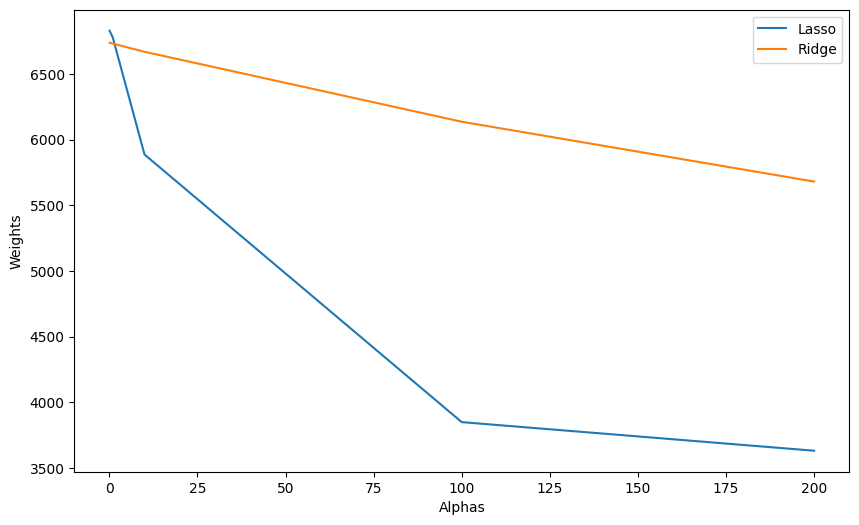

In [54]:
alphas = [0.1, 1, 10, 100, 200]

lasso_norms = []
ridge_norms = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    lasso_norms.append(np.linalg.norm(lasso.coef_))

    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    ridge_norms.append(np.linalg.norm(ridge.coef_))

plt.figure(figsize=(10, 6))
plt.plot(alphas, lasso_norms, label='Lasso')
plt.plot(alphas, ridge_norms, label='Ridge')
plt.xlabel('Alphas')
plt.ylabel('Weights')
plt.legend()
plt.show()

Как это видно, на графике (и по результатам оценки весов переменных) L1-регуляризация значительно агрессивнеее уменьшает веса (Lasso).
Lasso-регрессию используют для отбора признаков для исключения малозначимых или мультиколлинеарных признаков, делая модель несложной и легко интерпретируемой.

**Оптимизация регуляризации**

В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке.

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`.

In [55]:
from sklearn.linear_model import LassoCV


alphas = [0.1, 1, 10, 100, 200]


lasso_cv = LassoCV(alphas=alphas, cv=5)

lasso_cv.fit(X_train, y_train)

errors = lasso_cv.mse_path_
alphas_order = lasso_cv.alphas_

avg_errors = np.mean(errors, axis=1)

best_alpha_idx = np.argmin(avg_errors)
best_alpha = alphas_order[best_alpha_idx]

print(best_alpha)

1.0


**Итоговая Ridge-регрессия**

In [56]:
clf = Ridge(alpha=1)
clf.fit(X_train, y_train)
print(clf.coef_)
print(X_train.columns.values.tolist())

[ 5392.88736481  -100.79032464   -58.73458334 -1199.6036085
    10.32223955   -24.7719779    149.11752504  -361.55821386
   431.53634529  -282.80644707   141.83325113   262.48709859
    31.6343127   -153.14821535  -253.89878831   -92.45786376
   185.68254836   357.57177516   226.16622459    79.46229421
  -502.52619026 -2338.22908952  2590.23221516   510.87816369
  -889.23677068   548.75922827  -182.78874243   116.53005499
  -356.1450594 ]
['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_new', 'color_new', 'clarity_new', 'cut_Fair', 'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_D', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2']


**Сравнение моделей**

In [57]:
lasso_final = Lasso(alpha=1)
lasso_final.fit(X_train, y_train)

predictions_lasso = lasso_final.predict(X_test)
predictions_lr = lr.predict(X_test)

mse_lasso = mean_squared_error(y_test, predictions_lasso)
mse_lr = mean_squared_error(y_test, predictions_lr)
print(mse_lasso, mse_lr, sep='\n')

1298585.1600628241
1299831.767913519


Для предсказаний лучше использовать Lasso-регрессию, потому что её среднеквадратичная ошибка незначительно, но ниже. Это связано с тем, что мы в принципе применяли регуляризацию (L1), что занизило веса у мультиколлинеарных признаков, что впоследствии уменьшает ошибку.